# 4주차 스터디

Made by 35기 코딩부장 류제현

### 머신러닝을 위한 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 사용할 데이터셋 불러오기
card = pd.read_csv("Data/credit_card_approval.csv", 
                    index_col=0)

### 1. 데이터 전처리

    1-1) 피쳐(Feature)와 라벨(Label) 분리

In [3]:
# Feature는 X, Label은 y로 분리해 주겠습니다
X = card.iloc[:,1:]
y = card.TARGET

print(X.shape, y.shape)

(50000, 6) (50000,)


    1-2) Train-Test Split

ML을 위해서는 데이터를 Train_set(훈련세트)과 Test_set(테스트세트)로 분리해 줘야 한다

scikit-learn의 train_test_split 함수를 사용하면 된다

-> 왜 분리 할까? : Train-set으로 모델을 만든 이후, Test-set로 성능 측정을 한다

-> 훈련을 시킬 때 사용한 데이터로 모형의 성능까지 평가하면 해당 데이터셋에 과적합(Overfitting)될 수 있다

In [4]:
# train_test_split 함수를 불러온다
from sklearn.model_selection import train_test_split

# Shuffle이 필요하지만, train_test_split은 shuffle을 해줌 / 시계열일 경우는 달라진다(순서를 보존해야함)
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 잘 분리 된 것을 확인 할 수 있다
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37500, 6), (12500, 6), (37500,), (12500,))

    1-3) 고차항 특성 추가하기

scikit-learn의 PolynomialFeature를 사용해 고차항 특성을 추가해보겠습니다

In [5]:
# 예시를 위해 임의의 데이터를 생성하겠습니다
# reshape(-1,1)을 해주는 이유는? -> 각각을 하나의 데이터로 인식하도록 하기 위해서
X_sample = np.arange(1,5).reshape(-1,1)
X_sample

array([[1],
       [2],
       [3],
       [4]])

In [6]:
# 싸이킷런의 PolynomialFeatures 함수를 사용합니다
## 이것도 똑같이 모델을 만들고, fit해주면 됩니다. 추가로 데이터셋의 변환도 시켜줘야하기 때문에, transform도 추가됩니다
from sklearn.preprocessing import PolynomialFeatures

# degree로 몇 차식까지 추가할 지 선택할 수 있습니다
poly_features = PolynomialFeatures(degree=3, include_bias=False) # include_bias=True일 경우 1이 추가됩니다

# 만든 모델로 fit해주고, transform 시켜줍니다
poly_features.fit(X_sample)
X_poly = poly_features.transform(X_sample)
X_poly

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [7]:
# fit과 transform을 한번에 수행할 수도 있습니다
X_poly2 = poly_features.fit_transform(X_sample)
X_poly2

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

    1-4) 스케일 조절하기

* Normalization(정규화), MinMaxScaling(0과 1사이로 변경) 등이 다양한 Scaler가 있습니다 

* 몇몇 머신러닝 알고리즘을 제외하고는 대부분의 머신러닝 알고리즘이 피처(Feature)의 스케일에 민감합니다. 

* 예시) 삼성바이오로직스 주가(약 80만원) vs 엠피대산 주가(약 300원)

* 따라서, 특별히 가중치를 주는 경우가 아니라면 스케일을 동일하게 맞춰줄 필요가 있습니다

* fit을 해주면 필요한 통계량을 계산한다. 이후 transfrom 해준다. (!! Test_set에는 fit 하지 않도록 주의해야 한다 !! -> Data Leakage 누출 방지)

$X_{minmax} = {X - X_{min} \over X_{max} - X_{min}}$

In [8]:
# 우선 변환을 위해, 데이터의 수치 특성만 가져옵니다
print(X_train.columns)

X_train_numeric = X_train[['AMT_INCOME_TOTAL', 'DAYS_BIRTH','DAYS_EMPLOYED']]
X_test_numeric = X_test[['AMT_INCOME_TOTAL', 'DAYS_BIRTH','DAYS_EMPLOYED']]

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'JOB'],
      dtype='object')


In [9]:
# 확인해봅시다
X_train_numeric.head()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED
14469,202500.0,-20227,-5416
38399,202500.0,-12869,-340
17375,112500.0,-10064,-3173
42621,360000.0,-17271,-993
33102,135000.0,-14683,-5355


In [10]:
# 최소는 0, 최대는 1로 변환한다
from sklearn.preprocessing import MinMaxScaler

# train-set을 우선 fit_transform해준다
minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train_numeric) 

# test-set은 fit해주지 않고, transform만 해준다
X_test_minmax = minmax.transform(X_test_numeric)

In [11]:
# 확인해봅시다
X_train_minmax

array([[0.11337209, 0.25931622, 0.65602701],
       [0.11337209, 0.69454631, 0.97942151],
       [0.05523256, 0.86046374, 0.79892966],
       ...,
       [0.06976744, 0.56855554, 0.98063201],
       [0.04069767, 0.77114634, 0.7712156 ],
       [0.27325581, 0.50881344, 0.70533894]])

In [12]:
# 과연 최댓값은 1로, 최솟값은 0으로 변환이 되었을 지 확인해보자 

# argmax는 최대값이 위치한 인덱스를 반환합니다(argmin은 반대)
idx_max = np.argmax(X_train_minmax[:,0]) # 인덱싱이 어려우면 데이터프레임으로 생각하면 수월하다
idx_min = np.argmin(X_train_minmax[:,0])

# 최댓값은 1, 최솟값은 0으로 잘 변환이 된 것을 확인할 수 있습니다
print("최대: ", X_train_minmax[idx_max])
print("최소: ", X_train_minmax[idx_min])

최대:  [1.         0.85584999 0.84314475]
최소:  [0.         0.32432273 0.91679409]


In [13]:
# 많이 익숙한 "정규화" -> 데이터의 평균이 0, 분산은 1을 따르도록 변경한다
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X_train_numeric)
X_std

# test-set변환시키는건 생략하겠습니다

array([[ 4.29372242e-02, -1.53208281e+00, -1.10586261e+00],
       [ 4.29372242e-02,  6.22976600e-01,  1.01019085e+00],
       [-8.19647672e-01,  1.44452344e+00, -1.70813771e-01],
       ...,
       [-6.04001448e-01, -8.71802270e-04,  1.01811146e+00],
       [-1.03529390e+00,  1.00226471e+00, -3.52154050e-01],
       [ 2.41504569e+00, -2.96687242e-01, -7.83201976e-01]])

In [14]:
# 번외: 이 정도 전처리는 싸이킷런 없이도 할 수 있어야 한다.
## 직접 정규화를 수행해 봅시다.

# 정규화 -> 평균을 빼주고, 표준편차로 나눈다 
mean = X_train_numeric.mean(axis=0)   # 데이터에 따라 axis가 달라져야 할 수도 있음!
std = X_train_numeric.std(axis=0)

# 정규화 해주자 -> 결과가 똑같이 나왔다!!!
(X_train_numeric - mean) / std 

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED
14469,0.042937,-1.532062,-1.105848
38399,0.042937,0.622968,1.010177
17375,-0.819637,1.444504,-0.170811
42621,1.552440,-0.666301,0.737962
33102,-0.603993,0.091679,-1.080419
...,...,...,...
19746,0.603609,-0.208526,-1.036648
16961,-0.603993,0.588115,0.972242
28807,-0.603993,-0.000872,1.018098
12586,-1.035280,1.002251,-0.352149


    1-5) Null값 다루기 (Missing Values)

결측치(Null)를 다루는 다양한 방법이 있습니다 (Domain 지식이 필요)

1. 유사한 값을 찾아서 넣기 (평균, 중위수 등)

2. 단순히 결측치가 존재하는 데이터를 전부 Drop 해주기

In [15]:
# 새로운 데이터셋 불러오기 (타이타닉 데이터셋)
from seaborn import load_dataset
titanic = load_dataset("titanic")

# 단순화를 위해 데이터셋의 일부만 사용하겠습니다
titanic = titanic[["survived","age","sibsp","parch","class"]]
titanic.head(8)

,survived,age,sibsp,parch,class
0,0,22.0,1,0,Third
1,1,38.0,1,0,First
2,1,26.0,0,0,Third
3,1,35.0,1,0,First
4,0,35.0,0,0,Third
5,0,NaN,0,0,Third
6,0,54.0,0,0,First
7,0,2.0,3,1,Third


In [16]:
# 컬럼별로 결측치가 얼마나 있는지 알아봅시다
titanic.isna().sum()

survived      0
age         177
sibsp         0
parch         0
class         0
dtype: int64

In [17]:
# age의 데이터는 177개의 Missing-Values가 존재합니다.
# 177개의 데이터는 drop하기에는 너무 많습니다. 나이의 Null값에 평균 나이를 집어 넣는 간단한 방법으로 전처리 해 보겠습니다

# 평균 나이 구하기
mean_age = titanic.age.mean()

# fillna를 사용해서 missing-values에 mean_age채워주기
titanic.age = titanic.age.fillna(mean_age)
titanic.head(6) # 컬럼5에 나이의 평균값이 들어간걸 확인할 수 있다

,survived,age,sibsp,parch,class
0,0,22.000000,1,0,Third
1,1,38.000000,1,0,First
2,1,26.000000,0,0,Third
3,1,35.000000,1,0,First
4,0,35.000000,0,0,Third
5,0,29.699118,0,0,Third


    1-6) 범주형 특성(Categorical Data 다루기)

* 데이터의 순서가 의미가 있는 특성이 있고, 의미가 없는 특성이 있다

* 의미가 있는 특성은 순서가 있는 변수(Ordinal Variable)로, 없는 특성은 더미변수(Dummy Variable)로 변환해준다

In [18]:
# 다시 기존 card_dataset을 사용하겠습니다
card

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,JOB
0,0,Y,N,270000.0,-13258,-2300,Managers
1,0,N,N,81000.0,-17876,-377,Private service staff
2,0,Y,Y,270000.0,-19579,-1028,Laborers
3,0,Y,Y,112500.0,-15109,-1956,Core staff
4,0,Y,Y,139500.0,-17281,-5578,Drivers
...,...,...,...,...,...,...,...
49995,0,N,N,112500.0,-20285,-1734,High skill tech staff
49996,0,Y,Y,495000.0,-16497,-1190,Managers
49997,0,Y,Y,270000.0,-15054,-1527,High skill tech staff
49998,0,N,Y,103500.0,-15785,-1308,Medicine staff


In [19]:
# 범주형 데이터(Categorical Data)만 분리하겠습니다

card_cat = card[["FLAG_OWN_CAR","FLAG_OWN_REALTY", "JOB"]]
card_cat.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,JOB
0,Y,N,Managers
1,N,N,Private service staff
2,Y,Y,Laborers
3,Y,Y,Core staff
4,Y,Y,Drivers


In [20]:
# 더미변수로 변경 (Dummy variable)
## 설명을 위해 FLAG_OWN_CAR만 가져오겠습니다
pd.get_dummies(card_cat[["FLAG_OWN_CAR"]])

,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
49995,1,0
49996,0,1
49997,0,1
49998,1,0


In [21]:
# 통계학 / 계량경제학에서 사용하는 더미변수 (다중공선성(Multicollinearity) 방지)
pd.get_dummies(card_cat[["FLAG_OWN_CAR"]], 
               drop_first=True)

,FLAG_OWN_CAR_Y
0,1
1,0
2,1
3,1
4,1
...,...
49995,0
49996,1
49997,1
49998,0


In [22]:
# 데이터프레임 전체를 주면 판다스가 알아서 Categorical Data를 인식해서 더미를 만든다
pd.get_dummies(card)

,TARGET,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,JOB_Accountants,JOB_Cleaning staff,...,JOB_Laborers,JOB_Low-skill Laborers,JOB_Managers,JOB_Medicine staff,JOB_Private service staff,JOB_Realty agents,JOB_Sales staff,JOB_Secretaries,JOB_Security staff,JOB_Waiters/barmen staff
0,0,270000.0,-13258,-2300,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,81000.0,-17876,-377,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,270000.0,-19579,-1028,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,112500.0,-15109,-1956,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,139500.0,-17281,-5578,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,112500.0,-20285,-1734,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,495000.0,-16497,-1190,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
49997,0,270000.0,-15054,-1527,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,103500.0,-15785,-1308,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
# 이번엔 순서를가진(Ordinal) 데이터로 변경해보겠습니다
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
ordinal.fit_transform(card[["JOB"]])

array([[10.],
       [12.],
       [ 8.],
       ...,
       [ 6.],
       [11.],
       [ 4.]])

In [24]:
# 각 숫자가 무엇을 의미하는지 확인할 수 있습니다
ordinal.categories_

[array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
        'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
        'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
        'Private service staff', 'Realty agents', 'Sales staff',
        'Secretaries', 'Security staff', 'Waiters/barmen staff'],
       dtype=object)]

### 2. Overfitting & Underfitting

1. 너무 복잡한 모델을 사용하면 -> Overfit  (Train-set에 과적합 되어 있음을 의미)

2. 너무 단순한 모델을 사용하면 -> Underfit

둘 사이의 Trade-off가 존재함

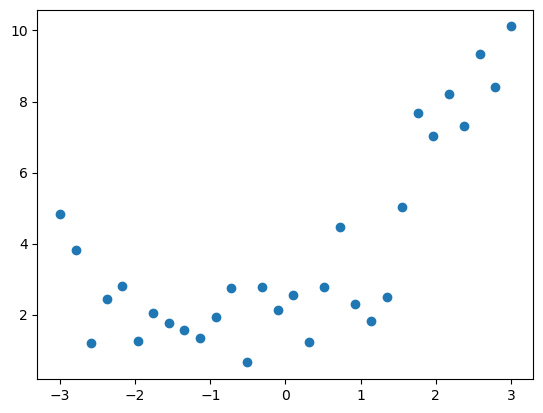

In [25]:
# 데이터 피팅을 위해서 임의의 데이터를 생성하겠습니다.
np.random.seed(10)
m = 30

X_new = np.linspace(-3,3,m).reshape(-1,1)
y_new = 0.5 * X_new**2 + X_new + 2 + np.random.randn(m, 1)
plt.scatter(X_new,y_new);

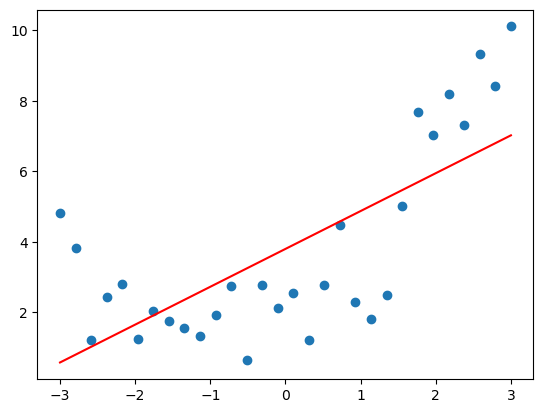

In [26]:
# Underfitting 예시 
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_new,y_new)

# 선형모형의 예측값을 저장하겠습니다
fitted_values = linear_model.predict(X_new)

# 그림으로 그려보겠습니다 -> 데이터의 2차식 특성을 똑바로 잡아내지 못 한 것을 확인할 수 있습니다
plt.scatter(X_new,y_new)
plt.plot(X_new,fitted_values, color='r');

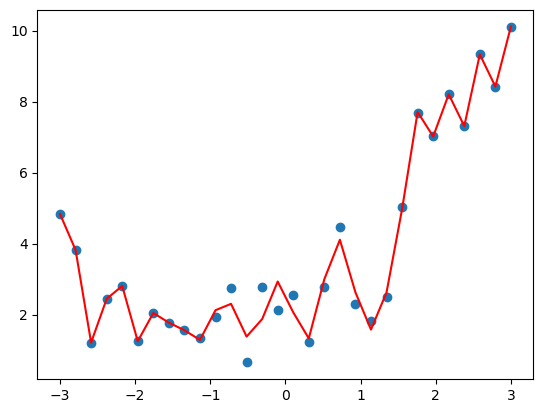

In [27]:
# Overfitting 예시 
from sklearn.linear_model import LinearRegression

# 30차식 (매우 복잡한 모델)로 모델을 짜보겠습니다
poly_feature = PolynomialFeatures(degree=25)
X_poly = poly_feature.fit_transform(X_new)

# 25차항의 다항식을 회귀
linear_model = LinearRegression()
linear_model.fit(X_poly,y_new)

# 선형모형의 예측값을 저장하겠습니다
fitted_values = linear_model.predict(X_poly)

# 그림으로 그려보겠습니다 -> 현재 주어진 데이터에 너무 과도하게 맞춰진 것을 확인할 수 있습니다 -> Overfit
plt.scatter(X_new,y_new)
plt.plot(X_new,fitted_values, color='r');

## 퀀트 기초: Daily-Return을 Weekly Return으로 변경해보자 (If time allow)

In [30]:
# 미국 S&P500 주가 불러오기
spx = pd.read_csv("Data/spx.csv", index_col=0,
                  parse_dates=True)

In [35]:
# 지난시간 복습) 데일리 리턴을 찍어보자
close = spx[["Close"]].copy()
close # 데이터프레임 형태로 종가만 가져오자

,Close
Date,
1969-01-02,103.93
1969-01-03,103.99
1969-01-06,102.47
1969-01-07,101.22
1969-01-08,100.80
...,...
2022-10-31,3871.98
2022-11-01,3856.10
2022-11-02,3759.69


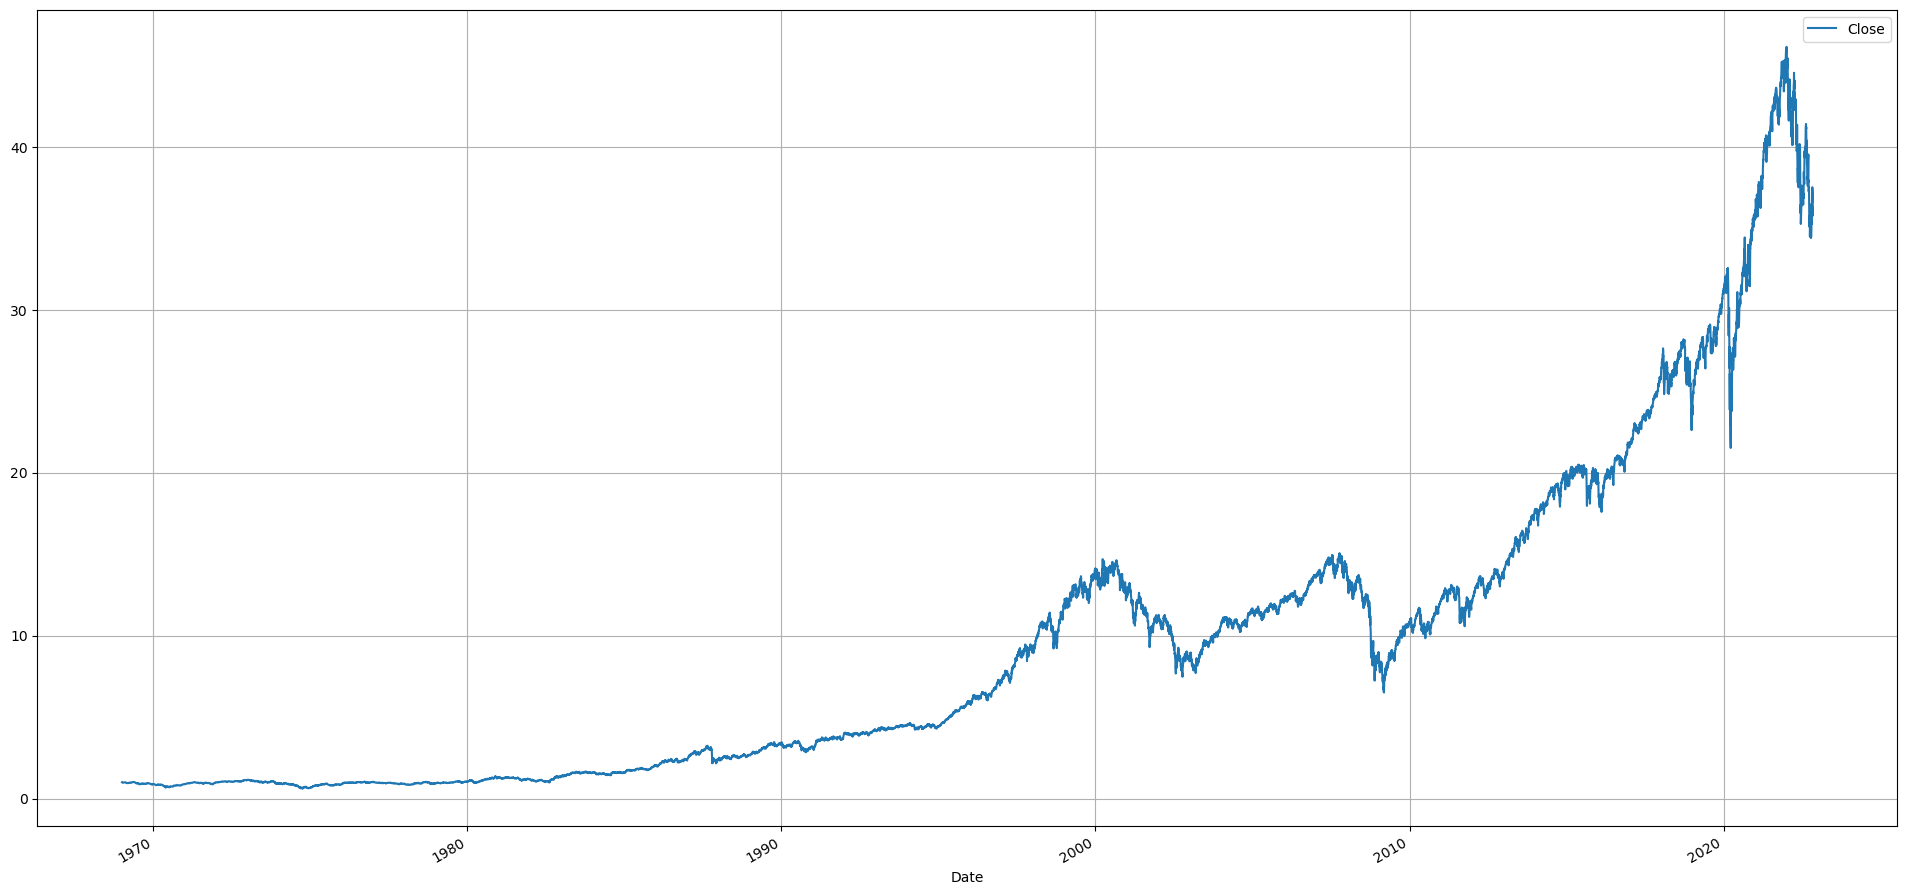

In [42]:
# Buy and Hold 전략
(close.pct_change() + 1).cumprod()\
                        .plot(figsize=(24,12))
plt.grid();

In [43]:
# 주간 리턴으로 변경
close.pct_change(7)

,Close
Date,
1969-01-02,NaN
1969-01-03,NaN
1969-01-06,NaN
1969-01-07,NaN
1969-01-08,NaN
...,...
2022-10-31,0.056250
2022-11-01,0.027540
2022-11-02,-0.009915


In [65]:
returns = close.pct_change(5)

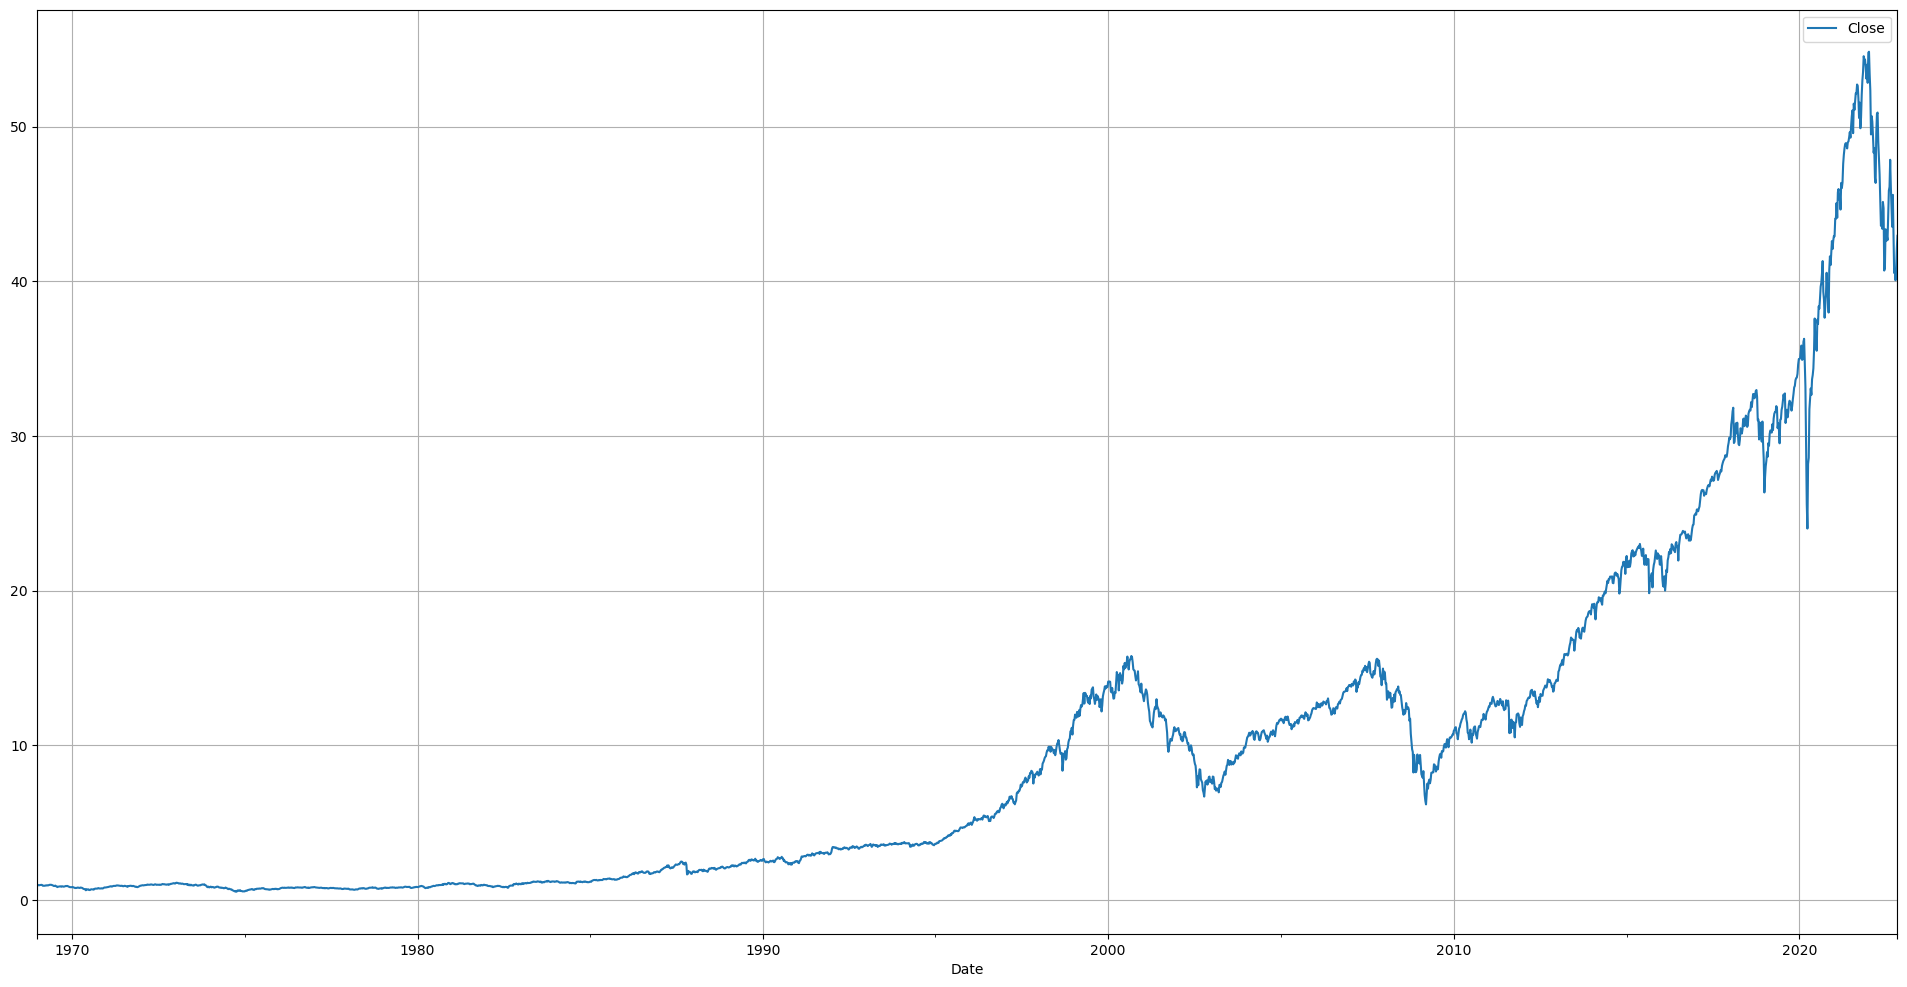

In [66]:
weekly_returns = returns.resample('W').first()
(weekly_returns + 1).cumprod().plot(figsize=(24,12))
plt.grid();